# Importing Libraries & Data

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

# Understanding the Data

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace = True)

In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# Understanding Features

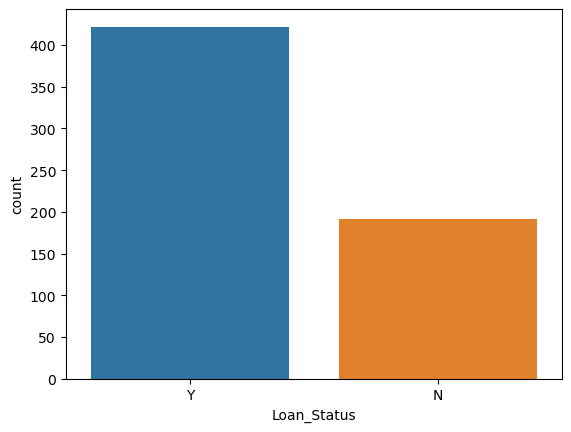

In [11]:
sns.countplot(x='Loan_Status', data=df)
plt.show()

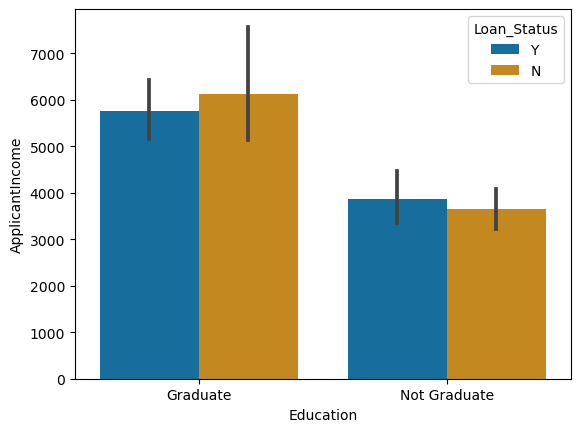

In [13]:
sns.barplot(x='Education',y='ApplicantIncome',data=df,palette='colorblind',hue='Loan_Status')
plt.show()

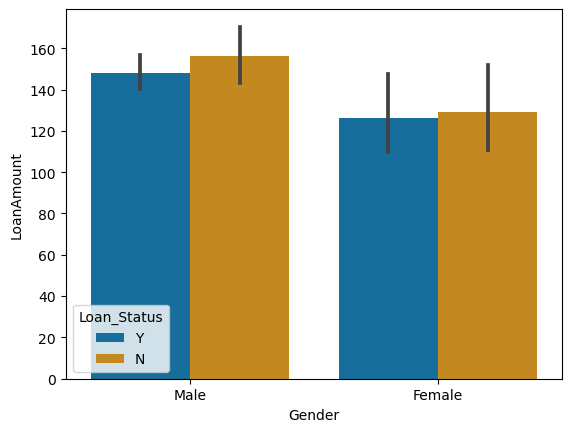

In [14]:
sns.barplot(x='Gender',y='LoanAmount',data=df,palette='colorblind',hue='Loan_Status')
plt.show()

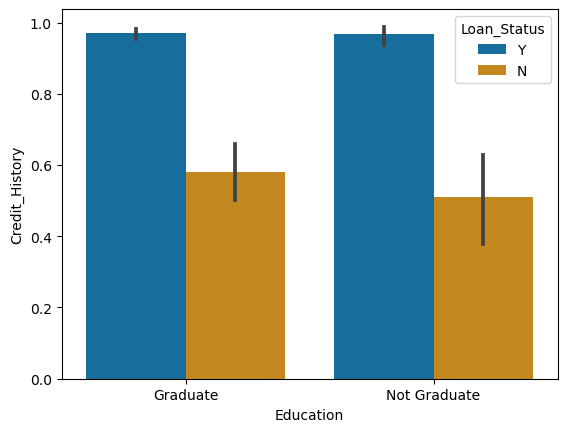

In [15]:
sns.barplot(x='Education',y='Credit_History',data=df,palette='colorblind',hue='Loan_Status')
plt.show()

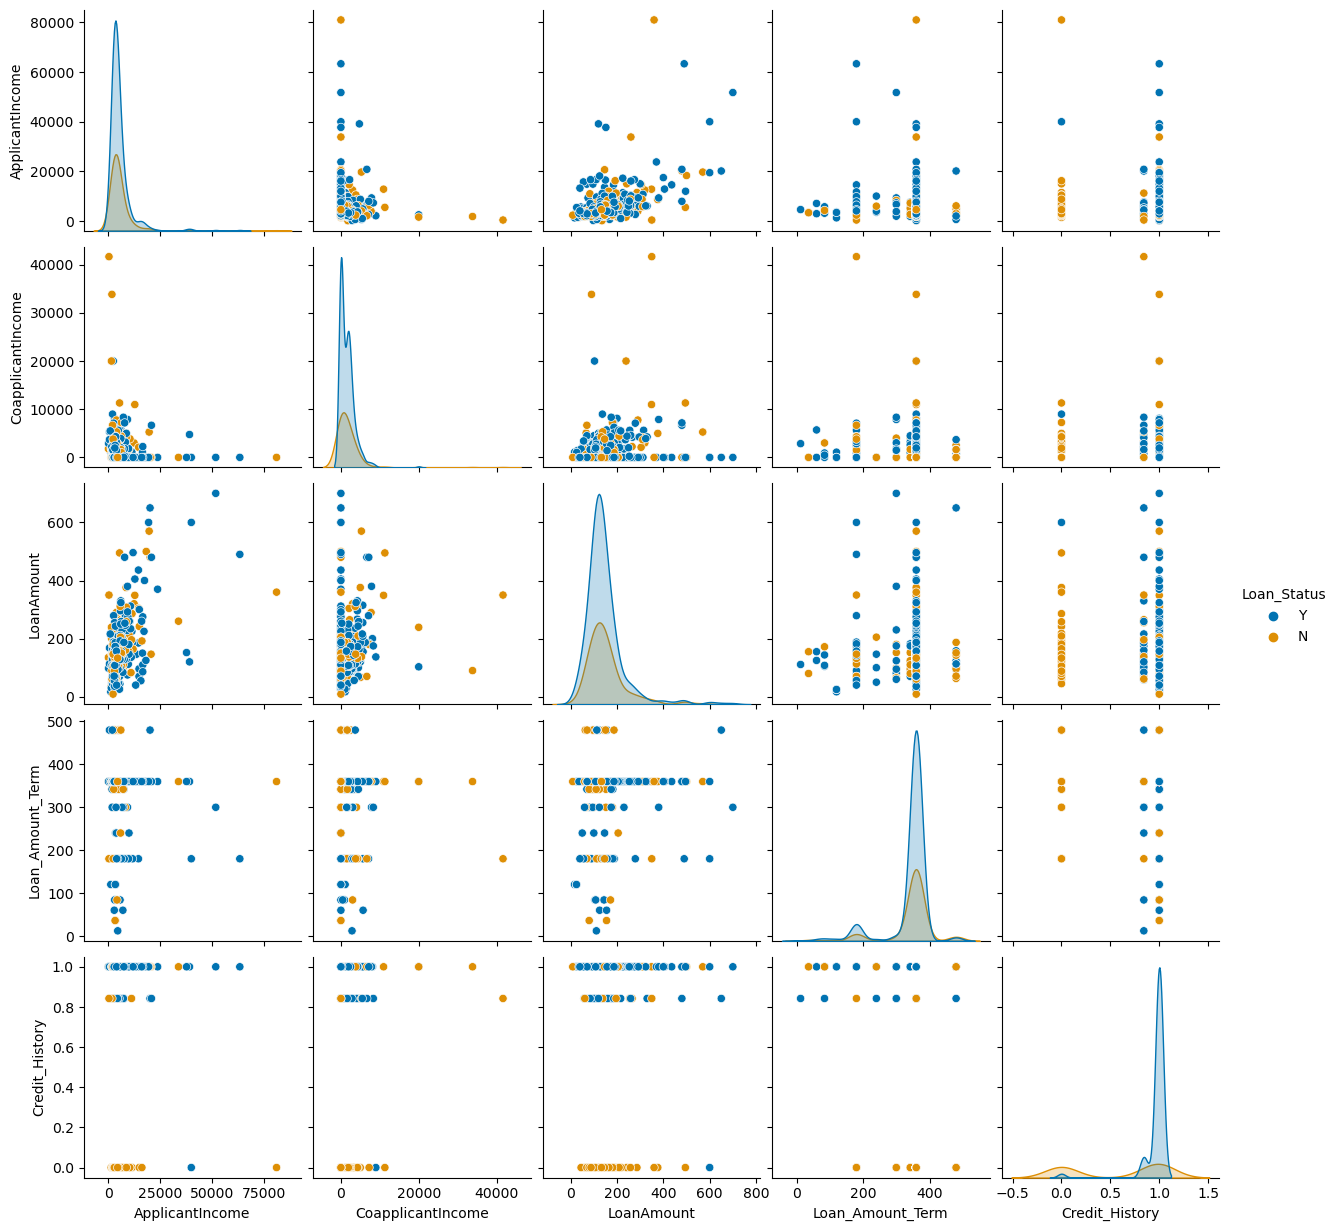

In [16]:
sns.pairplot(df, hue='Loan_Status', palette="colorblind")
plt.show()

# Encoding object data to Integer data

In [17]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


# Correlation Check

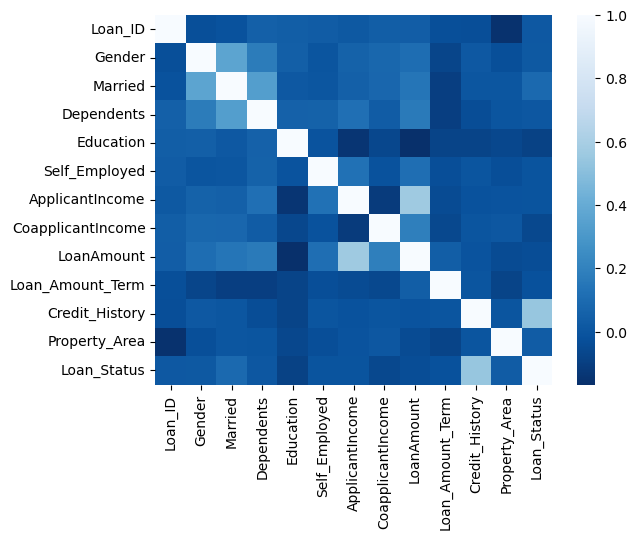

In [18]:
corr = df.corr()
sns.heatmap(corr,cmap='Blues_r')
plt.show()

In [19]:
corr['Loan_Status'].sort_values(ascending = False)

Loan_Status          1.000000
Credit_History       0.540483
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Loan_ID              0.011773
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.020974
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

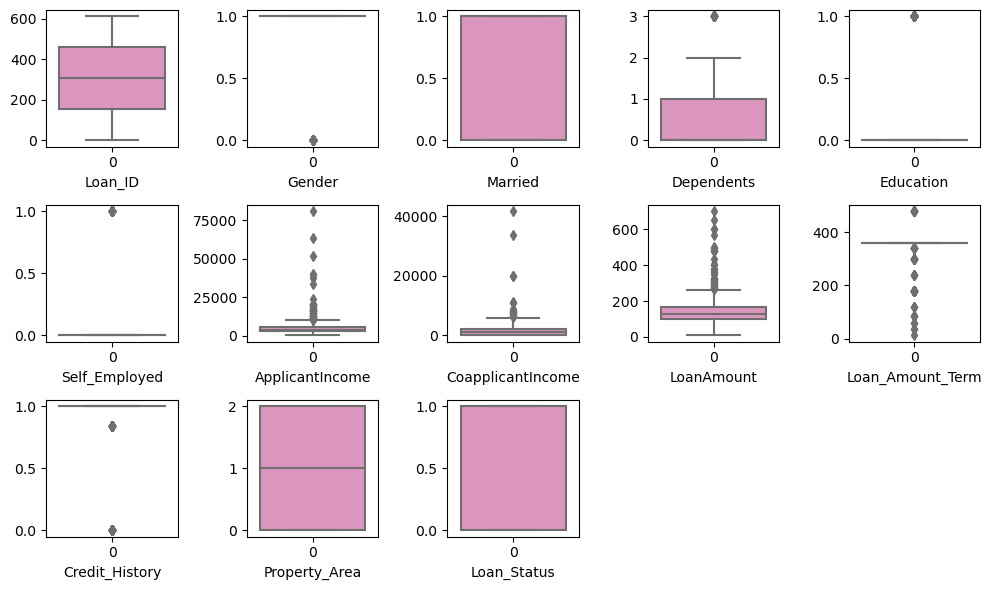

In [20]:
plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for c in df.columns:
    if plotnumber <= 13:
        x=plt.subplot(3,5,plotnumber)
        sns.boxplot(df[c], palette = "Set2_r")
        plt.xlabel(c, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

# Skewness Check

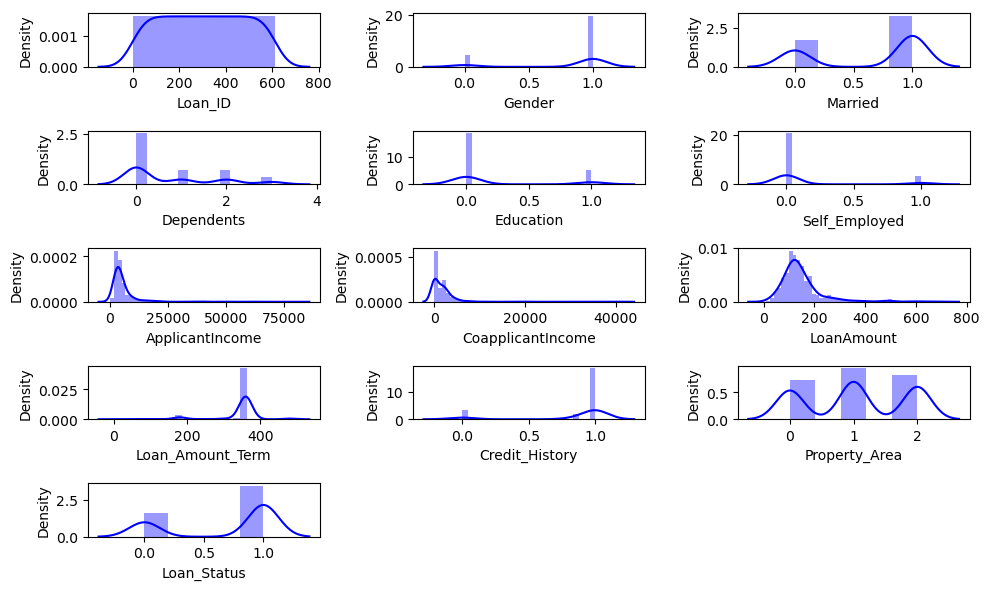

In [22]:
plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for c in df.columns:
    if plotnumber <= 13:
        x=plt.subplot(5,3,plotnumber)
        sns.distplot(df[c],color = "b")
        plt.xlabel(c, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

In [23]:
skew = df.skew()
skew

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [24]:
for i,score in skew.iteritems():
    if score > 0.5 or score < -0.5:
        df[i] = np.cbrt(df[i])
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           0.453698
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      2.083638
CoapplicantIncome    0.196726
LoanAmount           0.832841
Loan_Amount_Term    -3.573315
Credit_History      -2.014285
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [25]:
for i,score in skew.iteritems():
    if score > 0.5 or score < -0.5:
        df[i] = np.cbrt(df[i])
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           0.363336
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      1.030738
CoapplicantIncome   -0.184689
LoanAmount           0.151313
Loan_Amount_Term    -4.335777
Credit_History      -2.021070
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [26]:
for i,score in skew.iteritems():
    if score > 0.5 or score < -0.5:
        df[i] = np.cbrt(df[i])
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           0.352734
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.669805
CoapplicantIncome   -0.219081
LoanAmount          -0.094859
Loan_Amount_Term    -4.676775
Credit_History      -2.021869
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [27]:
for i,score in skew.iteritems():
    if score > 0.5 or score < -0.5:
        df[i] = np.cbrt(df[i])
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           0.351548
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.543922
CoapplicantIncome   -0.222927
LoanAmount          -0.180000
Loan_Amount_Term    -4.802781
Credit_History      -2.021959
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

# Assign feature and target data

In [28]:
x = df.drop('Loan_Status', axis =1)
y = df['Loan_Status']

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-1.729232,0.472343,-1.372089,-0.839953,-0.528362,-0.392601,0.512243,-1.117534,0.247926,0.269882,0.412305,1.223298
1,-1.723590,0.472343,0.728816,1.178055,-0.528362,-0.392601,0.133700,0.884562,-0.023300,0.269882,0.412305,-1.318513
2,-1.717948,0.472343,0.728816,-0.839953,-0.528362,2.547117,-0.521213,-1.117534,-1.353499,0.269882,0.412305,1.223298
3,-1.712307,0.472343,0.728816,-0.839953,1.892641,-0.392601,-0.751704,0.895642,-0.153387,0.269882,0.412305,1.223298
4,-1.706665,0.472343,-1.372089,-0.839953,-0.528362,-0.392601,0.551865,-1.117534,0.171866,0.269882,0.412305,1.223298
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.706665,-2.117107,-1.372089,-0.839953,-0.528362,-0.392601,-0.573462,-1.117534,-1.207381,0.269882,0.412305,-1.318513
610,1.712307,0.472343,0.728816,1.205612,-0.528362,-0.392601,-0.036492,-1.117534,-2.351972,-1.963607,0.412305,-1.318513
611,1.717948,0.472343,0.728816,1.178055,-0.528362,-0.392601,1.013917,0.839646,1.356419,0.269882,0.412305,1.223298
612,1.723590,0.472343,0.728816,1.195398,-0.528362,-0.392601,0.916438,-1.117534,0.742882,0.269882,0.412305,1.223298


In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.037392,Loan_ID
1,1.201343,Gender
2,1.421853,Married
3,1.186553,Dependents
4,1.065125,Education
5,1.047337,Self_Employed
6,1.839165,ApplicantIncome
7,1.534675,CoapplicantIncome
8,1.568473,LoanAmount
9,1.039437,Loan_Amount_Term


In [31]:
y.value_counts()

1.0    422
0.0    192
Name: Loan_Status, dtype: int64

In [32]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x, y)

In [33]:
y1.value_counts()

1.0    422
0.0    422
Name: Loan_Status, dtype: int64

# Model Creation

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRS = 0
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = i)
RFR = RandomForestClassifier()
RFR.fit(x_train,y_train)
pred = RFR.predict(x_test)
acc = accuracy_score(y_test,pred)
if acc>maxAccu:
    maxAccu = acc
    maxRS = i
        
print(maxAccu," at ",maxRS)

0.8503937007874016  at  135


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = maxRS)

In [41]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [42]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
prfc = RFC.predict(x_test)
print(accuracy_score(y_test,prfc))
print(confusion_matrix(y_test,prfc))
print(classification_report(y_test,prfc))

0.8582677165354331
[[102  28]
 [  8 116]]
              precision    recall  f1-score   support

         0.0       0.93      0.78      0.85       130
         1.0       0.81      0.94      0.87       124

    accuracy                           0.86       254
   macro avg       0.87      0.86      0.86       254
weighted avg       0.87      0.86      0.86       254



In [43]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
plr = LR.predict(x_test)
print(accuracy_score(y_test,plr))
print(confusion_matrix(y_test,plr))
print(classification_report(y_test,plr))

0.7047244094488189
[[ 68  62]
 [ 13 111]]
              precision    recall  f1-score   support

         0.0       0.84      0.52      0.64       130
         1.0       0.64      0.90      0.75       124

    accuracy                           0.70       254
   macro avg       0.74      0.71      0.70       254
weighted avg       0.74      0.70      0.69       254



In [44]:
svc = SVC()
svc.fit(x_train,y_train)
psvc = svc.predict(x_test)
print(accuracy_score(y_test,psvc))
print(confusion_matrix(y_test,psvc))
print(classification_report(y_test,psvc))

0.7007874015748031
[[ 72  58]
 [ 18 106]]
              precision    recall  f1-score   support

         0.0       0.80      0.55      0.65       130
         1.0       0.65      0.85      0.74       124

    accuracy                           0.70       254
   macro avg       0.72      0.70      0.70       254
weighted avg       0.72      0.70      0.69       254



In [45]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
pgb = GB.predict(x_test)
print(accuracy_score(y_test,pgb))
print(confusion_matrix(y_test,pgb))
print(classification_report(y_test,pgb))

0.8267716535433071
[[ 96  34]
 [ 10 114]]
              precision    recall  f1-score   support

         0.0       0.91      0.74      0.81       130
         1.0       0.77      0.92      0.84       124

    accuracy                           0.83       254
   macro avg       0.84      0.83      0.83       254
weighted avg       0.84      0.83      0.83       254



In [46]:
AB = AdaBoostClassifier()
AB.fit(x_train,y_train)
pab = AB.predict(x_test)
print(accuracy_score(y_test,pab))
print(confusion_matrix(y_test,pab))
print(classification_report(y_test,pab))

0.8031496062992126
[[ 97  33]
 [ 17 107]]
              precision    recall  f1-score   support

         0.0       0.85      0.75      0.80       130
         1.0       0.76      0.86      0.81       124

    accuracy                           0.80       254
   macro avg       0.81      0.80      0.80       254
weighted avg       0.81      0.80      0.80       254



In [47]:
B = BaggingClassifier()
B.fit(x_train,y_train)
pb = B.predict(x_test)
print(accuracy_score(y_test,pb))
print(confusion_matrix(y_test,pb))
print(classification_report(y_test,pb))

0.8385826771653543
[[104  26]
 [ 15 109]]
              precision    recall  f1-score   support

         0.0       0.87      0.80      0.84       130
         1.0       0.81      0.88      0.84       124

    accuracy                           0.84       254
   macro avg       0.84      0.84      0.84       254
weighted avg       0.84      0.84      0.84       254



In [48]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
pet = ET.predict(x_test)
print(accuracy_score(y_test,pet))
print(confusion_matrix(y_test,pet))
print(classification_report(y_test,pet))

0.8779527559055118
[[108  22]
 [  9 115]]
              precision    recall  f1-score   support

         0.0       0.92      0.83      0.87       130
         1.0       0.84      0.93      0.88       124

    accuracy                           0.88       254
   macro avg       0.88      0.88      0.88       254
weighted avg       0.88      0.88      0.88       254



In [49]:
score = cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,prfc) - score.mean())

[0.35502959 0.27218935 0.78106509 0.64497041 0.4702381 ]
0.5046985066215836
Diff b/w Acc score and cross val score : 0.35356920991384955


In [50]:
score = cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,plr) - score.mean())

[0.65680473 0.60946746 0.71005917 0.63313609 0.61309524]
0.6445125387433079
Diff b/w Acc score and cross val score : 0.06021187070551093


In [51]:
score = cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,psvc) - score.mean())

[0.66863905 0.62130178 0.73964497 0.69822485 0.63690476]
0.6729430825584671
Diff b/w Acc score and cross val score : 0.027844319016335994


In [52]:
score = cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,pgb) - score.mean())

[0.36094675 0.24852071 0.4260355  0.46153846 0.44047619]
0.3875035221189067
Diff b/w Acc score and cross val score : 0.43926813142440035


In [53]:
score = cross_val_score(AB,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,pab) - score.mean())

[0.35502959 0.28994083 0.58579882 0.41420118 0.42261905]
0.4135178923640462
Diff b/w Acc score and cross val score : 0.38963171393516643


In [54]:
score = cross_val_score(B,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,pb) - score.mean())

[0.37278107 0.29585799 0.64497041 0.66863905 0.45833333]
0.48811637080867853
Diff b/w Acc score and cross val score : 0.35046630635667575


In [55]:
score = cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,pet) - score.mean())

[0.63905325 0.63905325 0.81656805 0.84615385 0.69642857]
0.727451394759087
Diff b/w Acc score and cross val score : 0.15050136114642476


In [56]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion' : ['gini', 'entropy'], 
              'random_state' : [10, 50, 1000], 
              'max_depth' : [0, 10, 20], 
              'n_jobs' : [-2, -1, 1], 
              'n_estimators' : [50, 100, 200, 300],}

In [58]:
GVC = GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5)
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [59]:
GVC.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 1000}

In [60]:
Final_model = ExtraTreesClassifier(criterion = 'entropy', max_depth = 20, n_estimators = 300, n_jobs = -2, random_state = 1000)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

88.58267716535433


In [62]:
import joblib
joblib.dump(Final_model,"loan.pkl")

['loan.pkl']

In [63]:
model = joblib.load("loan.pkl")
prediction = model.predict(x_test)

In [64]:
a = np.array(y_test)
df = pd.DataFrame()
df['predicted'] = prediction
df['Original'] = a
df

,predicted,Original
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,1.0,1.0
...,...,...
249,1.0,1.0
250,0.0,1.0
251,1.0,1.0
252,1.0,1.0
